In [2]:
import sys
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, plot_confusion_matrix, classification_report
from sklearn.cluster import KMeans
import yfinance
import stock_utils
import config
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
tickers = stock_utils.fetch_liquid_stocks(min_price=10)

In [4]:
ignored = stock_utils.get_ignored_symbols()

In [5]:
filtered_tickers = list(set(tickers) - set(ignored))

In [12]:
print(f'Total filtered stocks: {len(filtered_tickers)}')
print('')
print(filtered_tickers)

Total filtered stocks: 189

['KMI', 'WEN', 'CLNE', 'SNAP', 'RUN', 'KO', 'SCHW', 'TIGR', 'TPR', 'HBI', 'CVX', 'IPG', 'SLM', 'XOM', 'MTCH', 'JBLU', 'MRNA', 'AAPL', 'HPQ', 'KR', 'PCG', 'AMD', 'MRK', 'IFF', 'ATVI', 'MS', 'SPWR', 'MDT', 'ANGI', 'PSTG', 'MSFT', 'NVAX', 'WFC', 'ATUS', 'FCX', 'NVDA', 'FTI', 'DD', 'APPS', 'RMG', 'COG', 'BA', 'KODK', 'DVAX', 'MPC', 'HPE', 'NEM', 'AMAT', 'C', 'PINS', 'CCL', 'IBM', 'DIS', 'BNGO', 'VZ', 'WKHS', 'BLNK', 'TMUS', 'DVN', 'SRNE', 'EBAY', 'VERU', 'WORK', 'JEF', 'SABR', 'LYFT', 'GT', 'BSX', 'BAC', 'CAH', 'KHC', 'X', 'USB', 'COP', 'SINO', 'SYF', 'PG', 'PM', 'NRZ', 'WMB', 'UNH', 'MO', 'DXC', 'EOG', 'INO', 'SUNW', 'GE', 'ON', 'SPG', 'PLUG', 'AA', 'SQ', 'MOS', 'CUB', 'SAVE', 'NEE', 'OXY', 'ARYA', 'UAA', 'LUV', 'PRTS', 'PFE', 'WMT', 'MGM', 'FTV', 'BCRX', 'DELL', 'CSCO', 'KEY', 'GM', 'DAL', 'CLF', 'SLB', 'F', 'KDP', 'AES', 'MU', 'ZNGA', 'FEYE', 'FHN', 'LEN', 'AVXL', 'DDD', 'MVIS', 'PBF', 'EQT', 'HST', 'LVS', 'INTC', 'JNJ', 'GEVO', 'BBBY', 'WWR', 'CSX', 'ISBC', 

In [7]:
# async with aiohttp.ClientSession() as session:
#     for t in filtered_tickers[:253]:
#         data[t] =  await stock_utils.fetch_historical_data_financialmodelingprep(t, config.FINANCIALMODELINGPREP_API, session, save_to_file=True)

In [8]:
PERIOD = '2y'

In [9]:
data = {}
for t in filtered_tickers:
    try:
        s = yfinance.Ticker(t)
        data[t] =  s.history(period=PERIOD)
        data[t].reset_index(inplace=True)
        data[t].columns = data[t].columns.str.lower()
        data[t] = data[t].iloc[::-1,:].reset_index(drop=True)
    except :
        print(t)

In [192]:
from bar import Bar

In [193]:
patterns_list2 = []
for key in data.keys():
    if data[key].empty or len(data[key]) < 2:
        continue
    try:
        bar1 = Bar(
            data[key].loc[0, 'open'],
            data[key].loc[0, 'high'],
            data[key].loc[0, 'low'],
            data[key].loc[0, 'close']
        )
        bar2 = Bar(
            data[key].loc[1, 'open'],
            data[key].loc[1, 'high'],
            data[key].loc[1, 'low'],
            data[key].loc[1, 'close']
        )
        if bar1  <= bar2:
            patterns_list2.append(key)
    except ValueError as e:
        print(e)
    except Exception as e:
        print(e)
        

        

Open price must be between High and Low:
 High:106.23999786376953 => Open:101.8499984741211 >= Low:101.87010192871094
Open price must be between High and Low:
 High:62.33000183105469 => Open:59.84000015258789 >= Low:59.90999984741211


In [194]:
patterns_list = []
for key in data.keys():
    if data[key].empty or len(data[key]) < 3:
        continue
    try:
        bar1 = Bar(
            data[key].loc[0, 'open'],
            data[key].loc[0, 'high'],
            data[key].loc[0, 'low'],
            data[key].loc[0, 'close'],
        )
        bar2 = Bar(
            data[key].loc[1, 'open'],
            data[key].loc[1, 'high'],
            data[key].loc[1, 'low'],
            data[key].loc[1, 'close'],
        )
        bar3 = Bar(
            data[key].loc[2, 'open'],
            data[key].loc[2, 'high'],
            data[key].loc[2, 'low'],
            data[key].loc[2, 'close'],
        )
        if bar1 <= bar2 <= bar3:
            patterns_list.append(key)
    except ValueError as e:
        print(e)
        

Open price must be between High and Low:
 High:106.23999786376953 => Open:101.8499984741211 >= Low:101.87010192871094
Open price must be between High and Low:
 High:62.33000183105469 => Open:59.84000015258789 >= Low:59.90999984741211


In [195]:
','.join(set(patterns_list+patterns_list2))

'SNAP,RUN,SCHW,TIGR,HBI,IPG,MTCH,KR,PCG,MRK,SPWR,MS,ATVI,ANGI,MDT,ATUS,FCX,FTI,APPS,RMG,COG,BA,NEM,C,CCL,PINS,TMUS,DVN,EBAY,SABR,GT,CAH,KHC,X,NRZ,UNH,SUNW,PLUG,AA,UAA,PFE,WMT,MGM,BCRX,CSCO,KEY,CLF,F,ZNGA,LEN,AVXL,EQT,HST,LVS,BBBY,ISBC,TSLA,GSX,TWTR,M,SBUX,NCLH,QCOM,DBX,PEP,CVS,FOXA,MAC,AFL,AGNC,NOV,GME,NKE,HBAN,EXC,TXN,EPD,GILD,CNC'

In [196]:
','.join(patterns_list2)

'SNAP,RUN,SCHW,TIGR,HBI,IPG,MTCH,KR,PCG,MRK,ATVI,MS,SPWR,MDT,ANGI,ATUS,FCX,FTI,APPS,RMG,COG,BA,NEM,C,PINS,CCL,TMUS,DVN,EBAY,SABR,GT,CAH,KHC,X,NRZ,UNH,SUNW,PLUG,AA,UAA,PFE,WMT,MGM,BCRX,CSCO,KEY,CLF,F,ZNGA,LEN,AVXL,EQT,HST,LVS,BBBY,ISBC,TSLA,GSX,TWTR,M,SBUX,NCLH,QCOM,DBX,PEP,CVS,FOXA,MAC,AFL,AGNC,NOV,GME,NKE,HBAN,EXC,TXN,EPD,GILD,CNC'

In [197]:
patterns_list3 = []
for key in data.keys():
    if data[key].empty or len(data[key]) < 3:
        continue
    try:
        bar1 = Bar(
            data[key].loc[0, 'open'],
            data[key].loc[0, 'high'],
            data[key].loc[0, 'low'],
            data[key].loc[0, 'close'],
        )
        bar2 = Bar(
            data[key].loc[1, 'open'],
            data[key].loc[1, 'high'],
            data[key].loc[1, 'low'],
            data[key].loc[1, 'close'],
        )
        bar3 = Bar(
            data[key].loc[2, 'open'],
            data[key].loc[2, 'high'],
            data[key].loc[2, 'low'],
            data[key].loc[2, 'close'],
        )
        if (bar3.range / bar2.range >= 1.7) and (bar2.range / bar1.range) >= 0.95:
            patterns_list3.append(key)
    except ValueError as e:
        print(e)
        

Open price must be between High and Low:
 High:106.23999786376953 => Open:101.8499984741211 >= Low:101.87010192871094
Open price must be between High and Low:
 High:62.33000183105469 => Open:59.84000015258789 >= Low:59.90999984741211


In [198]:
','.join(patterns_list3)

'MDT,WKHS,SUNW,CSCO,AVXL,BBBY,SAVA,MAC,HBAN,EXC'

In [199]:
patterns_list4 = []
for key in data.keys():
    if data[key].empty or len(data[key]) < 3:
        continue
    try:
        bar1 = Bar(
            data[key].loc[0, 'open'],
            data[key].loc[0, 'high'],
            data[key].loc[0, 'low'],
            data[key].loc[0, 'close'],
        )
        bar2 = Bar(
            data[key].loc[1, 'open'],
            data[key].loc[1, 'high'],
            data[key].loc[1, 'low'],
            data[key].loc[1, 'close'],
        )
        if (bar2.range * 1.5 < bar1.range) and ((bar1._close > bar2._high) or (bar1._close < bar2._low)):
            patterns_list4.append(key)
    except ValueError as e:
        print(e)
','.join(patterns_list4)    

Open price must be between High and Low:
 High:106.23999786376953 => Open:101.8499984741211 >= Low:101.87010192871094
Open price must be between High and Low:
 High:62.33000183105469 => Open:59.84000015258789 >= Low:59.90999984741211


'KMI,WEN,CLNE,XOM,MRNA,HPQ,AMD,NVAX,WFC,NVDA,DVAX,MPC,HPE,DIS,BNGO,SRNE,VERU,JEF,COP,SINO,EOG,INO,ON,SQ,MOS,OXY,ARYA,LUV,PRTS,GM,DAL,MU,PBF,GEVO,CSX,PYPL,MARA,PENN,ABBV,VLO,APA,RIOT,V,RF,FCEL,NIO,T,UAL'

# Data Wrangling

In [258]:
def dummy_featuring(series_df, prefix):
    series_df['per_changed'] =  round((series_df.close - series_df.shift(-1).close)*100 / series_df.shift(-1).close, 2)
    series_df['cluster'] = pd.cut(series_df.per_changed, bins=[-99 , -5, -4.5 , -4, -3.5, -3, -2.5, -2, -1.5, -1, -0.5, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5,  np.inf], labels=list(range(21))) 
    #series_df['cluster'] = pd.cut(series_df.per_changed, bins=[-99,-3 ,-0.5, 0.5, 3, np.inf], labels=list(range(5)))
    #series_df['cluster'] = pd.cut(series_df.per_changed, bins=[-99, -0.5, 0.5, np.inf], labels=list(range(3)))
    dummy_df = pd.get_dummies(series_df['cluster'], prefix=prefix, prefix_sep='_', drop_first=True)
    return pd.concat([series_df[['date']], dummy_df], axis=1)
    #return dummy_df
    

def df_featuring_v2(series_df):
    series_df['per_changed'] =  round((series_df.close - series_df.shift(-1).close)*100 / series_df.shift(-1).close, 2)
    #series_df['cluster'] = pd.cut(series_df.per_changed, bins=[-99,-6, -4, -2, -0.5, 0.5, 2, 4, 6, np.inf], labels=list(range(9)))
    #series_df['cluster'] = pd.cut(series_df.per_changed, bins=[-99, -2, -0.5, 0.5, 2, np.inf], labels=list(range(5)))
    series_df['cluster'] = pd.cut(series_df.per_changed, bins=[-99, -0.7, 0.7, np.inf], labels=list(range(3)))
    series_df['gap'] =  (series_df.open > series_df.shift(-1).high) | (series_df.open < series_df.shift(-1).low)
    return series_df[['date', 'open', 'high', 'low', 'close', 'cluster', 'gap']]

def model_df_v2(series_df, days=3):
    # model columns
    c =  []
    model_columns = []
    for n in range(days,0,-1):
        model_columns.extend(['o_'+str(n),
                  'h_'+str(n),
                  'l_'+str(n),
                  'c_'+str(n)])
    model_columns.append('o_0')
    c.extend(model_columns)

    spy_dummy_columns= ['spy_'+str(n) for n in range(1, 21)]
    vix_dummy_columns= ['vix_'+str(n) for n in range(1, 21)]
    qqq_dummy_columns= ['qqq_'+str(n) for n in range(1, 21)]
    dxy_dummy_columns= ['dxy_'+str(n) for n in range(1, 21)]
    dummy_columns = spy_dummy_columns + vix_dummy_columns + qqq_dummy_columns + dxy_dummy_columns
    c.extend(dummy_columns)
    c.append('cluster')
    df = pd.DataFrame(columns=c)
    for n in range(days,0,-1):
        df['o_' + str(n)] = series_df.shift(-n)['open']
        df['h_' + str(n)] = series_df.shift(-n)['high']
        df['l_' + str(n)] = series_df.shift(-n)['low']
        df['c_' + str(n)] = series_df.shift(-n)['close']
    df['o_0'] = series_df['open']
    df['cluster'] = series_df['cluster']   
    df[dummy_columns] = series_df[dummy_columns]
    df.dropna(inplace=True)
    # opened without gap
    df = df[series_df['gap'] == False]

    #normalization
    scaler = MinMaxScaler()
    df[model_columns] = scaler.fit_transform(df[model_columns].T).T
    return df 

In [259]:
def get_ticker_data(ticker, period='2y'):
    res = yfinance.Ticker(ticker)
    res =  res.history(period=period)
    res.reset_index(inplace=True)
    res.columns = res.columns.str.lower()
    res = res.iloc[::-1,:].reset_index(drop=True)
    return res

In [260]:
vix = get_ticker_data('^VIX', period=PERIOD)
vix_dummy = dummy_featuring(vix, 'vix')
vix_dummy

,date,vix_1,vix_2,vix_3,vix_4,vix_5,vix_6,vix_7,vix_8,vix_9,...,vix_11,vix_12,vix_13,vix_14,vix_15,vix_16,vix_17,vix_18,vix_19,vix_20
0,2021-02-08,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,2021-02-05,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2021-02-04,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2021-02-03,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2021-02-02,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,2019-02-15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
499,2019-02-14,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
500,2019-02-13,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
501,2019-02-12,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [261]:
qqq = get_ticker_data('QQQ', period=PERIOD)
qqq_dummy = dummy_featuring(qqq, 'qqq')
qqq_dummy

,date,qqq_1,qqq_2,qqq_3,qqq_4,qqq_5,qqq_6,qqq_7,qqq_8,qqq_9,...,qqq_11,qqq_12,qqq_13,qqq_14,qqq_15,qqq_16,qqq_17,qqq_18,qqq_19,qqq_20
0,2021-02-08,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1,2021-02-05,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2021-02-04,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,2021-02-03,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2021-02-02,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,2019-02-15,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
499,2019-02-14,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
500,2019-02-13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
501,2019-02-12,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [262]:
spy = get_ticker_data('SPY', period=PERIOD)
spy

,date,open,high,low,close,volume,dividends,stock splits
0,2021-02-08,389.269989,390.559998,388.350006,390.510010,38463195,0.0,0
1,2021-02-05,388.200012,388.470001,386.140015,387.709991,48620300,0.0,0
2,2021-02-04,382.959991,386.239990,381.970001,386.190002,47142600,0.0,0
3,2021-02-03,382.440002,383.700012,380.480011,381.850006,52427100,0.0,0
4,2021-02-02,379.649994,383.220001,376.320007,381.549988,64450700,0.0,0
...,...,...,...,...,...,...,...,...
498,2019-02-15,266.251908,267.263521,266.030339,267.224976,97088700,0.0,0
499,2019-02-14,263.766330,265.558315,262.889611,264.344391,83234400,0.0,0
500,2019-02-13,264.970552,265.837628,264.517741,264.932007,65277200,0.0,0
501,2019-02-12,262.456070,264.479237,262.378979,264.074615,72270200,0.0,0


In [263]:
dxy = get_ticker_data('DX-Y.NYB', period=PERIOD)
dxy_dummy = dummy_featuring(dxy, 'dxy')
dxy_dummy

,date,dxy_1,dxy_2,dxy_3,dxy_4,dxy_5,dxy_6,dxy_7,dxy_8,dxy_9,...,dxy_11,dxy_12,dxy_13,dxy_14,dxy_15,dxy_16,dxy_17,dxy_18,dxy_19,dxy_20
0,2021-02-08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2021-02-05,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2021-02-04,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2021-02-03,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2021-02-02,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,2019-02-14,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
495,2019-02-13,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
496,2019-02-12,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
497,2019-02-11,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [264]:
spy_dummy = dummy_featuring(spy, 'spy')
spy_dummy = spy_dummy.merge(vix_dummy, on='date', how='left')
spy_dummy = spy_dummy.merge(qqq_dummy, on='date', how='left')
spy_dummy = spy_dummy.merge(dxy_dummy, on='date', how='left')
spy_dummy

,date,spy_1,spy_2,spy_3,spy_4,spy_5,spy_6,spy_7,spy_8,spy_9,...,dxy_11,dxy_12,dxy_13,dxy_14,dxy_15,dxy_16,dxy_17,dxy_18,dxy_19,dxy_20
0,2021-02-08,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2021-02-05,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2021-02-04,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2021-02-03,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2021-02-02,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,2019-02-15,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
499,2019-02-14,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
500,2019-02-13,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
501,2019-02-12,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [265]:
featured_dfs = []
for key in data.keys():
    if data[key].empty:
        continue
    f_data = df_featuring_v2(data[key])
    merge_data = f_data.merge(spy_dummy, on='date', how='left')
    m = model_df_v2(merge_data, days=4)
    featured_dfs.append(m)
m = pd.concat(featured_dfs, ignore_index=True)
m

,o_4,h_4,l_4,c_4,o_3,h_3,l_3,c_3,o_2,h_2,...,dxy_12,dxy_13,dxy_14,dxy_15,dxy_16,dxy_17,dxy_18,dxy_19,dxy_20,cluster
0,0.656250,0.734375,0.234374,0.421875,0.906249,0.921875,0.000000,0.093751,0.140625,0.859375,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,0.760000,1.000000,0.346667,0.440000,0.560000,0.626667,0.199999,0.360001,0.773333,0.786667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.920741,1.000000,0.554165,0.682961,0.575019,0.756604,0.262290,0.332906,0.423698,0.474139,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,0.846697,1.000000,0.639737,0.731719,0.639737,0.754714,0.394451,0.425112,0.509429,0.570751,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.683168,0.970297,0.455446,0.693069,0.801980,1.000000,0.534654,0.653466,0.534653,0.683168,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64273,0.319444,0.375001,0.097221,0.263890,0.180555,0.569446,0.000000,0.333334,0.402775,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
64274,0.385966,0.622807,0.000000,0.429825,0.570176,0.605265,0.429825,0.535089,0.482457,0.728072,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
64275,0.518073,0.879517,0.265060,0.554216,0.530120,0.855419,0.000000,0.590360,0.783132,0.831326,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
64276,0.767123,0.945206,0.273972,0.547945,0.589042,1.000000,0.301370,0.630137,0.602740,0.972601,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [113]:
kmeans_data = m[['o_3', 'h_3', 'l_3', 'c_3', 'o_2', 'h_2', 'l_2', 'c_2', 'o_1', 'h_1','l_1', 'c_1']]
kmeans_data

,o_3,h_3,l_3,c_3,o_2,h_2,l_2,c_2,o_1,h_1,l_1,c_1
0,0.294521,0.739726,0.000000,0.719178,0.904110,1.000000,0.191780,0.527398,0.527398,0.883562,0.171233,0.527398
1,0.107955,1.000000,0.000000,0.090909,0.261364,0.630682,0.017046,0.613636,0.767046,0.846591,0.176136,0.454546
2,0.420000,1.000000,0.406667,0.494667,0.466667,0.512000,0.000000,0.054667,0.084000,0.293333,0.058667,0.080000
3,0.022667,0.466667,0.013333,0.438667,0.420000,1.000000,0.406667,0.494667,0.466667,0.512000,0.000000,0.054667
4,0.019608,0.182238,0.000000,0.149942,0.154556,0.538639,0.146482,0.514418,0.498270,1.000000,0.486736,0.562861
...,...,...,...,...,...,...,...,...,...,...,...,...
63898,0.945056,1.000000,0.000000,0.692305,0.659339,0.934064,0.296704,0.648352,0.472528,0.857142,0.230768,0.384614
63899,0.021979,1.000000,0.021979,0.615382,0.945056,1.000000,0.000000,0.692305,0.659339,0.934064,0.296704,0.648352
63900,0.086067,1.000000,0.000000,0.442623,0.393443,0.758197,0.393443,0.614753,0.737705,0.758197,0.385247,0.643442
63901,0.577868,0.696721,0.389344,0.500000,0.086067,1.000000,0.000000,0.442623,0.393443,0.758197,0.393443,0.614753


In [159]:
#m = model_df_v2(dfs, days=3)
#m

#  Train-test split

In [267]:
X_train, X_test, y_train, y_test = train_test_split(m.drop(['cluster'], axis=1), m.cluster, stratify=m.cluster, test_size=0.25)

In [268]:
len(y_train[y_train == 0]) / len(y_train)

0.34583471622967143

In [269]:
len(y_train[y_train == 1]) / len(y_train)

0.30565466312645206

In [270]:
len(y_train[y_train == 2]) / len(y_train)

0.34851062064387656

# Random Forest

In [166]:
gsc = GridSearchCV(estimator=RandomForestClassifier(),
                  param_grid={
                      'max_depth' : range(3, 10),
                      'n_estimators' : (9, 50, 100, 500, 1000, 2000)
                  }, 
                  cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)

In [167]:
grid_results = gsc.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
grid_results.best_params_

In [ ]:
rfc_model = grid_results.best_estimator_

In [81]:
rfc_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, n_estimators=10)

### Evaluation

In [82]:
y_pred = rfc_model.predict(X_test)

In [83]:
accuracy_score(y_pred, y_test)

0.49573647345447164

In [40]:
def generalize(x):
    if x < 1:
        return 0
    elif x > 1:
        return 2
    else :
        return 1
    
gfunc = np.vectorize(generalize)

In [41]:
accuracy_score(gfunc(y_pred), gfunc(y_test))

0.5000263476840385

In [240]:
X[1]

array([8.92877518e-04, 3.57142492e-02, 0.00000000e+00, 3.03571544e-02,
       8.92877518e-04, 3.57142492e-02, 0.00000000e+00, 3.03571544e-02,
       9.74107063e-01, 1.00000000e+00, 9.64285580e-01, 9.82142790e-01,
       9.74107063e-01])

# Deep Learning

In [75]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.initializers import TruncatedNormal
from tensorflow.keras.initializers import Constant

In [319]:
from  sklearn.base import BaseEstimator, ClassifierMixin


class DeepModel(BaseEstimator, ClassifierMixin):
    def __init__(self):
        self.deep_model = Sequential()
        
        
    def fit(self, X, y):
        init_kernel = TruncatedNormal(mean=0, stddev=0.05, seed=1234)
        init_bias = Constant(value=1e-3)
        

        es_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
        input_dim = X.shape[1]
        hidden_units = int(input_dim / 2)
        self.deep_model.add(Dense(hidden_units, input_dim=input_dim, activation='relu', kernel_initializer=init_kernel, bias_initializer=init_bias))
        #deep_model.add(Dropout(0.5))
        self.deep_model.add(Dense(hidden_units, activation='relu', kernel_initializer=init_kernel, bias_initializer=init_bias))
        #deep_model.add(Dense(35, activation='relu', kernel_initializer=init_kernel, bias_initializer=init_bias))
        # deep_model.add(Dense(32, activation='relu', kernel_initializer=init_kernel, bias_initializer=init_bias))
        # deep_model.add(Dropout(0.4))
        self.deep_model.add(Dense(3, activation='softmax', kernel_initializer=init_kernel, bias_initializer=init_bias))
        self.deep_model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
        self.deep_model.fit(X, y, epochs=2000, batch_size=32, validation_split=0.2, callbacks=[es_callback])#, validation_data=(X_val, y_val))
        
        
    def predict_proba(self, X):
        return self.deep_model.predict(X)
    
    
    def predict(self, X):
        pred = []
        for res in self.deep_model.predict(X_test):
            pred.append(np.argmax(res))
        return np.array(pred)
    
    
    def get_params(self, deep=True):
        return dict()
    
    
    def set_params(self, **parameters):
        return self

## Potential SELL

In [272]:
clus = 0
deep_model.evaluate(X_test[y_test ==clus], y_test[y_test ==clus])

174/174 [==============================] - 0s 593us/step - loss: 0.7627 - accuracy: 0.6758


[0.7627151012420654, 0.6757826805114746]

## Potential BUY

In [273]:
clus = 2
deep_model.evaluate(X_test[y_test ==clus], y_test[y_test ==clus])

176/176 [==============================] - 0s 567us/step - loss: 1.0160 - accuracy: 0.5322


[1.0160470008850098, 0.5322263836860657]

In [35]:
y_test.value_counts()

2    6178
0    6093
1    5864
Name: cluster, dtype: int64

In [36]:


accuracy_score(y_test,  pred)

0.5348221670802316

In [37]:
deep_model.save('01_23_21.model')

INFO:tensorflow:Assets written to: 01_23_21.model\assets


#  Prediction

In [322]:
loaded_model = tf.keras.models.load_model('12_23_20.model')

In [323]:
up, down = [], []
for key in data.keys():
    stock = data[key].iloc[:4]
    df = df_featuring_v2(stock).merge(spy_dummy, on='date', how='left')
    try:
        mt = model_df_v2(df)
    except:
        continue
    pred = loaded_model.predict(mt.drop(['cluster'], axis=1))
    signal = np.argmax(pred)
    if signal == 0:
        down.append((key, pred[0][signal]))
    elif signal == 2:
        up.append((key, pred[0][signal]))

In [324]:
up.sort(key= lambda s : s[1], reverse=True)
up

[('DIS', 0.5602764),
 ('MARA', 0.50385004),
 ('RIOT', 0.4739845),
 ('JNJ', 0.41651472),
 ('WMT', 0.4164169),
 ('PBCT', 0.40450177),
 ('POLA', 0.37074807),
 ('RF', 0.34795973)]

In [325]:
down.sort(key= lambda s : s[1], reverse=True)
down

[('INTC', 0.8266818),
 ('MGM', 0.7462077),
 ('FUV', 0.7262829),
 ('WDC', 0.72622013),
 ('FANG', 0.71726835),
 ('TAL', 0.6970729),
 ('HPQ', 0.6706808),
 ('CSCO', 0.6659724),
 ('LUV', 0.66370827),
 ('TIGR', 0.65436524),
 ('AAL', 0.64604807),
 ('NVDA', 0.64337885),
 ('FIS', 0.63136345),
 ('SUNW', 0.6282672),
 ('JNPR', 0.61720806),
 ('BBBY', 0.60545313),
 ('AAPL', 0.6053156),
 ('DVN', 0.60336214),
 ('SPWR', 0.60221076),
 ('COG', 0.5951812),
 ('JCI', 0.58229613),
 ('DDD', 0.5822772),
 ('DBX', 0.58187324),
 ('VUZI', 0.5808423),
 ('SNAP', 0.58016646),
 ('FEYE', 0.5798619),
 ('FSLY', 0.5753547),
 ('UAL', 0.57488525),
 ('COF', 0.5678569),
 ('ORCL', 0.56497693),
 ('CLNE', 0.56293476),
 ('LVS', 0.56232405),
 ('GPS', 0.5557153),
 ('D', 0.5523694),
 ('NFLX', 0.5519825),
 ('WY', 0.55074865),
 ('RUN', 0.55057204),
 ('MRNA', 0.54882926),
 ('PFE', 0.54881394),
 ('KIM', 0.54834497),
 ('CVS', 0.5342834),
 ('CHNG', 0.5338598),
 ('EXC', 0.5314146),
 ('KHC', 0.52155036),
 ('AGNC', 0.5179788),
 ('RMG', 0.514

In [89]:
list(zip(*up))[0]

('SRNE',
 'WFC',
 'GNPX',
 'KMI',
 'JBLU',
 'MDLZ',
 'AES',
 'PG',
 'WMB',
 'FCX',
 'V',
 'DVN',
 'M',
 'RF',
 'AFL',
 'KOS',
 'USB',
 'PFE',
 'AMAT',
 'JWN',
 'NOV',
 'HBAN',
 'MRO',
 'FANG',
 'CNP',
 'C',
 'DAL',
 'EBAY',
 'GM',
 'EVRG',
 'TRVN',
 'CVX',
 'SM',
 'NLY',
 'CCL',
 'GLW',
 'NEE',
 'SCHW',
 'COP',
 'PPL',
 'APA',
 'NRZ',
 'BAC',
 'TWTR',
 'HAL',
 'CSX',
 'OXY',
 'XOM',
 'COTY',
 'PSTG',
 'PAGP',
 'GE',
 'PBF',
 'X',
 'BSX',
 'SLB',
 'HPE',
 'MPC',
 'AEO',
 'HL',
 'BE',
 'AM',
 'KO',
 'F',
 'VZ',
 'PRTY',
 'SPWR',
 'AR',
 'CVS',
 'CNK',
 'RUN',
 'JCI',
 'MO',
 'RAD',
 'SIRI',
 'MFA',
 'TPR',
 'HBI',
 'OPK',
 'LUV',
 'BBBY',
 'BA',
 'JPM',
 'QEP',
 'WORK',
 'CPE',
 'MGM',
 'NYMT',
 'AQMS',
 'CLF',
 'PAA',
 'LYFT',
 'MRK',
 'AAPL',
 'IDEX',
 'JNJ')

In [ ]:
clf_xgb.fit(X_train, y_train, verbose=)

# XGBOOST

In [32]:
import  xgboost as xgb

In [312]:
clf_xgb = xgb.XGBClassifier(missing=None, seed=1234, objective='multi:softmax', num_class=3)

In [105]:
clf_xgb.fit(X_train, y_train, verbose=True, early_stopping_rounds=10, eval_metric=['mlogloss', 'merror'], eval_set=[(X_test, y_test)])

[0]	validation_0-mlogloss:1.05710	validation_0-merror:0.49795
[1]	validation_0-mlogloss:1.03269	validation_0-merror:0.49890
[2]	validation_0-mlogloss:1.01679	validation_0-merror:0.49549
[3]	validation_0-mlogloss:1.00689	validation_0-merror:0.49026
[4]	validation_0-mlogloss:1.00008	validation_0-merror:0.49001
[5]	validation_0-mlogloss:0.99461	validation_0-merror:0.48679
[6]	validation_0-mlogloss:0.99015	validation_0-merror:0.48503
[7]	validation_0-mlogloss:0.98605	validation_0-merror:0.48219
[8]	validation_0-mlogloss:0.98296	validation_0-merror:0.48194
[9]	validation_0-mlogloss:0.97963	validation_0-merror:0.47999
[10]	validation_0-mlogloss:0.97677	validation_0-merror:0.47866
[11]	validation_0-mlogloss:0.97449	validation_0-merror:0.47955
[12]	validation_0-mlogloss:0.97221	validation_0-merror:0.47822
[13]	validation_0-mlogloss:0.97094	validation_0-merror:0.47671
[14]	validation_0-mlogloss:0.96953	validation_0-merror:0.47753
[15]	validation_0-mlogloss:0.96776	validation_0-merror:0.47646
[1

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=12, num_class=3, num_parallel_tree=1,
              objective='multi:softprob', random_state=1234, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, seed=1234, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [39]:
#ignored_filter = y_test != 1
#X_test_filtered = X_test[ignored_filter]
#y_test_filtered = y_test[ignored_filter]

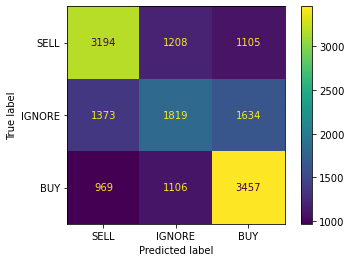

In [106]:
plot_confusion_matrix(clf_xgb,
                     X_test,
                     y_test,
                     values_format='d',
                     display_labels=['SELL', 'IGNORE', 'BUY'])

In [107]:
print(classification_report(y_test, clf_xgb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.58      0.58      0.58      5507
           1       0.44      0.38      0.41      4826
           2       0.56      0.62      0.59      5532

    accuracy                           0.53     15865
   macro avg       0.53      0.53      0.52     15865
weighted avg       0.53      0.53      0.53     15865



## GridSearchCV

In [108]:
param_grid = {
    'max_depth' : [8],
    'learning_rate' : [0.1],
    'gamma' : [0.25],
    'reg_lambda' : [1],
}
gsc_xgb = GridSearchCV(estimator=xgb.XGBClassifier(missing=None, 
                                                   seed=1234,
                                                   objective='multi:softmax', 
                                                   num_class=3,
                                                  ),
                  param_grid=param_grid, 
                  cv=5, scoring='neg_mean_squared_error', verbose=2, n_jobs=-1)

In [109]:
xgb_grid_results = gsc_xgb.fit(X_train, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   5 | elapsed:  2.6min remaining:  1.8min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  2.6min finished


[14:37:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [111]:
# {'gamma': 0.25, 'learning_rate': 0.1, 'max_depth': 8, 'reg_lambda': 1}
gsc_xgb.best_params_

{'gamma': 0.25, 'learning_rate': 0.1, 'max_depth': 8, 'reg_lambda': 1}

In [112]:
best_cls = gsc_xgb.best_estimator_
#best_cls.fit(X_train, y_train, verbose=True, early_stopping_rounds=10, eval_metric=['mlogloss', 'merror'], eval_set=[(X_test, y_test)])

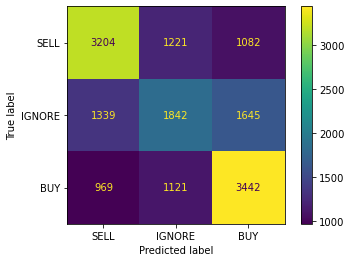

In [117]:
plot_confusion_matrix(best_cls,
                     X_test,
                     y_test,
                     values_format='d',
                     display_labels=['SELL', 'IGNORE', 'BUY'])

In [116]:
print(classification_report(y_test, best_cls.predict(X_test)))

              precision    recall  f1-score   support

           0       0.58      0.58      0.58      5507
           1       0.44      0.38      0.41      4826
           2       0.56      0.62      0.59      5532

    accuracy                           0.54     15865
   macro avg       0.53      0.53      0.53     15865
weighted avg       0.53      0.54      0.53     15865



In [71]:
import shap

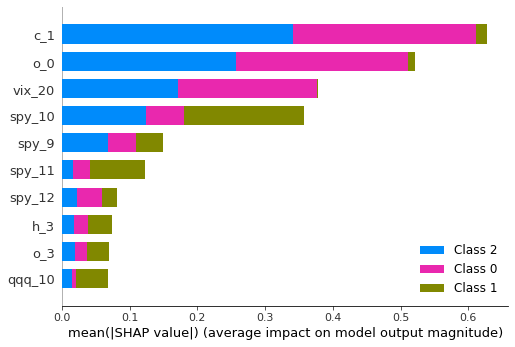

In [81]:
explainer = shap.TreeExplainer(best_cls)
shap_values = explainer.shap_values(X_test_filtered)
shap.summary_plot(shap_values, X_test_filtered, max_display=10)

## XGBoost Prediction

In [47]:
up, down = [], []
for key in data.keys():
    stock = data[key].iloc[:4]
    df = df_featuring_v2(stock).merge(spy_dummy, on='date', how='left')
    try:
        mt = model_df_v2(df)
    except:
        continue
    pred = best_cls.predict(mt.drop(['cluster'], axis=1))
    if pred == 0:
        down.append(key)
    elif pred == 2:
        up.append(key)

In [48]:
up

['JNJ', 'SAVA']

In [49]:
down

['GS',
 'KDP',
 'RCL',
 'BE',
 'HST',
 'SABR',
 'SLB',
 'AMAT',
 'HAL',
 'HPE',
 'JBLU',
 'KIM',
 'K',
 'PRTS',
 'PBCT',
 'PLUG',
 'PCG',
 'PYPL',
 'C',
 'IBM',
 'EOG',
 'NVDA',
 'D',
 'PK',
 'MGM',
 'DBX',
 'BYND',
 'NVTA',
 'SO',
 'TAL',
 'COP',
 'CTVA',
 'BMY',
 'KHC',
 'MUR',
 'AFL',
 'CNX',
 'WBA',
 'RUN',
 'UAA',
 'MTCH',
 'CVS',
 'LB',
 'DISH',
 'APA',
 'EXC',
 'AA',
 'MS',
 'XOM',
 'WU',
 'JCI',
 'LYFT',
 'LVS',
 'POLA',
 'F',
 'CFG',
 'CL',
 'PENN',
 'FCX',
 'GM',
 'GILD',
 'OXY',
 'DVN',
 'HPQ',
 'VST',
 'HOME',
 'SFIX',
 'ON',
 'PPL',
 'WFC',
 'CVX',
 'PFE',
 'SAVE',
 'FHN',
 'CPB',
 'MET',
 'FB',
 'GIS',
 'BLNK',
 'DD',
 'GE',
 'MDLZ',
 'MU',
 'KEY',
 'PSTG',
 'GPS',
 'OSTK',
 'WKHS',
 'ALLY',
 'NOV',
 'CYH',
 'AAL',
 'TJX',
 'LUV',
 'GPK',
 'FOLD',
 'NFLX',
 'BK',
 'TXN',
 'AMD',
 'UBER',
 'KMI',
 'EPD',
 'ORCL',
 'FTI',
 'SLM',
 'BAC',
 'DIS',
 'USB',
 'HRL']

In [52]:
stock = data['INTC'].iloc[:4]
df = df_featuring_v2(stock).merge(spy_dummy, on='date', how='left')
try:
    mt = model_df_v2(df)
except:
    pass
pred = best_cls.predict(mt.drop(['cluster'], axis=1))
pred

array([0], dtype=int64)

# Catboost

In [119]:
from catboost import CatBoostClassifier

In [179]:
class CatBoostClassifierMod(CatBoostClassifier):
    def predict(self, X):
        return super().predict(X).flatten()

In [311]:
cat_model = CatBoostClassifierMod(iterations=1000,
                               loss_function='MultiClass',
                               grow_policy='Lossguide',
                               verbose=50
                              )
cat_model.set_scale_and_bias(0.25, 0.25)

In [181]:
grid = {'learning_rate': [0.5],
        'depth': [11],
        'max_leaves': [60, 70, 80],
        'l2_leaf_reg': [1]}

In [182]:
cat_model.grid_search(grid, X=X_train, y=y_train)


bestTest = 0.9850893907
bestIteration = 29

0:	loss: 0.9850894	best: 0.9850894 (0)	total: 1.99s	remaining: 3.98s

bestTest = 0.9829759326
bestIteration = 29

1:	loss: 0.9829759	best: 0.9829759 (1)	total: 4.37s	remaining: 2.19s

bestTest = 0.9870625585
bestIteration = 26

2:	loss: 0.9870626	best: 0.9829759 (1)	total: 6.76s	remaining: 0us
Estimating final quality...


{'params': {'max_leaves': 70,
  'depth': 11,
  'l2_leaf_reg': 1,
  'learning_rate': 0.5},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,

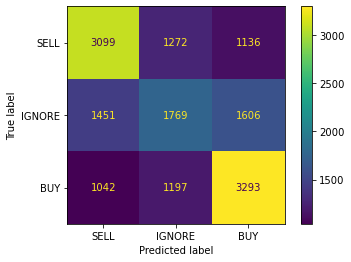

In [183]:
plot_confusion_matrix(cat_model,
                     X_test,
                     y_test,
                     values_format='d',
                     display_labels=['SELL', 'IGNORE', 'BUY'])

In [124]:
print(classification_report(y_test, cat_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.55      0.56      0.56      5507
           1       0.42      0.37      0.39      4826
           2       0.55      0.60      0.57      5532

    accuracy                           0.51     15865
   macro avg       0.51      0.51      0.51     15865
weighted avg       0.51      0.51      0.51     15865



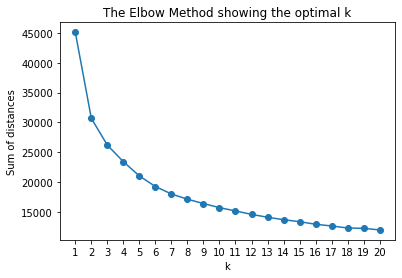

In [114]:
K = range(1, 21)
kmeans_models = [KMeans(n_clusters=k, n_init=100).fit(kmeans_data) for k in K]
dist = [model.inertia_ for model in kmeans_models]

plt.plot(K, dist, marker='o')
plt.xlabel('k')
plt.ylabel('Sum of distances')
plt.xticks(K)
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [131]:
K = 2

In [132]:
len(kmeans_models[K-1].labels_[kmeans_models[K-1].labels_ == 0])

31683

In [133]:
len(kmeans_models[K-1].labels_[kmeans_models[K-1].labels_ == 1])

32220

In [134]:
len(kmeans_models[K-1].labels_[kmeans_models[K-1].labels_ == 2])

0

In [129]:
m['cluster'][:10]

0    0
1    1
2    2
3    2
4    0
5    2
6    2
7    2
8    1
9    2
Name: cluster, dtype: category
Categories (3, int64): [0 < 1 < 2]

In [130]:
kmeans_models[K-1].labels_[:10]

array([1, 0, 2, 1, 0, 0, 2, 1, 0, 0])

In [1]:
sorted(['catboost', 'decision tree', 'deep learning', 'linear/logistic regression', 'random forest', 'svm', 'xgboost', 'time series analysis'])


['catboost',
 'decision tree',
 'deep learning',
 'linear/logistic regression',
 'random forest',
 'svm',
 'time series analysis',
 'xgboost']

In [136]:
cat_model.predict(X_test).reshape((1,-1))

array([[1, 2, 2, ..., 0, 0, 1]], dtype=int64)

In [138]:
((cat_model.predict(X_test).reshape((1,-1)) == clf_xgb.predict(X_test)) &  (clf_xgb.predict(X_test)== y_test.values)).sum() / len(y_test)

0.4320201701859439

In [129]:
y_test.values

[0, 2, 0, 1, 1, ..., 2, 0, 2, 0, 1]
Length: 15865
Categories (3, int64): [0 < 1 < 2]

# Voting Classifier

In [140]:
from sklearn.ensemble import VotingClassifier

In [320]:
deep_model = DeepModel()

In [337]:
voting_clf = VotingClassifier(
    estimators = [('xgb', clf_xgb), ('cat', cat_model), ('deep_model', deep_model)],
    voting='soft'
)

In [322]:
voting_clf.fit(X_train, y_train)

[20:14:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate set to 0.096419
0:	learn: 1.0832533	total: 21.4ms	remaining: 21.4s
50:	learn: 0.9709730	total: 1.15s	remaining: 21.4s
100:	learn: 0.9527247	total: 2.13s	remaining: 18.9s
150:	learn: 0.9371784	total: 3.01s	remaining: 16.9s
200:	learn: 0.9231780	total: 3.92s	remaining: 15.6s
250:	learn: 0.9099987	total: 4.99s	remaining: 14.9s
300:	learn: 0.8986262	total: 5.93s	remaining: 13.8s
350:	learn: 0.8872279	total: 6.85s	remaining: 12.7s
400:	learn: 0.8764577	total: 7.78s	remaining: 11.6s
450:	learn: 0.8661689	total: 8.71s	remaining: 10.6s
500:	learn: 0.8567449	total: 9.58s	remaining: 9.54s
550:	learn: 0.8475713	total: 10.6s	remaining: 8.65s
600:	learn: 0.8384103	total: 11.6s	re

VotingClassifier(estimators=[('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, gamma=None,
                                            gpu_id=None, importance_type='gain',
                                            interaction_constraints=None,
                                            learning_rate=None,
                                            max_delta_step=None, max_depth=None,
                                            min_child_weight=None, missing=None,
                                            monotone_constraints=None,
                                            n_estimators=100, n_jobs=None,
                                            num_class=3, num_parallel_tree=None,
                                            objective='multi:softm

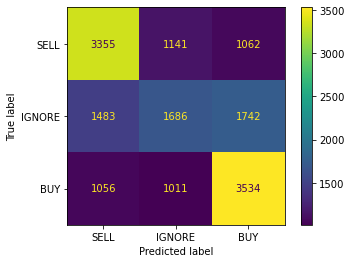

In [323]:
plot_confusion_matrix(voting_clf,
                     X_test,
                     y_test,
                     values_format='d',
                     display_labels=['SELL', 'IGNORE', 'BUY'])

In [324]:
print(classification_report(y_test, voting_clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.57      0.60      0.59      5558
           1       0.44      0.34      0.39      4911
           2       0.56      0.63      0.59      5601

    accuracy                           0.53     16070
   macro avg       0.52      0.53      0.52     16070
weighted avg       0.53      0.53      0.53     16070



# Blender 

In [325]:
blender_datasets = []
for n in range(3,10):
    featured_dfs = []
    for key in data.keys():
        if data[key].empty:
            continue
        f_data = df_featuring_v2(data[key])
        merge_data = f_data.merge(spy_dummy, on='date', how='left')
        m = model_df_v2(merge_data, days=n)
        featured_dfs.append(m)
    blender_datasets.append( pd.concat(featured_dfs, ignore_index=True))

In [339]:
results_df = pd.DataFrame()
for i, data in enumerate(blender_datasets, start=3):
    X = data.drop('cluster', axis=1).copy()[:len(blender_datasets[-1])]
    y = data['cluster'].copy()[:len(blender_datasets[-1])]
    model = voting_clf.fit(X, y)
    results = model.predict(X)
    results_df['classifier_'+str(i)] = results

[21:25:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Learning rate set to 0.097788
0:	learn: 1.0822368	total: 32.8ms	remaining: 32.8s
50:	learn: 0.9669428	total: 1.44s	remaining: 26.8s
100:	learn: 0.9515298	total: 2.76s	remaining: 24.6s
150:	learn: 0.9393011	total: 4s	remaining: 22.5s
200:	learn: 0.9281085	total: 5.2s	remaining: 20.7s
250:	learn: 0.9184173	total: 6.39s	remaining: 19.1s
300:	learn: 0.9098368	total: 7.53s	remaining: 17.5s
350:	learn: 0.9012708	total: 8.8s	remaining: 16.3s
400:	learn: 0.8935459	total: 10.1s	remaining: 15.1s
450:	learn: 0.8856385	total: 11.5s	remaining: 13.9s
500:	learn: 0.8781272	total: 12.7s	remaining: 12.7s
550:	learn: 0.8708035	total: 14.1s	remaining: 11.5s
600:	learn: 0.8641481	total: 15.4s	remaini

In [342]:
results_df['y'] = blender_datasets[-1]['cluster']
results_df

,classifier_0,classifier_1,classifier_2,classifier_3,classifier_4,classifier_5,classifier_6,y
0,2,2,2,2,2,2,2,2
1,1,2,2,2,2,2,2,0
2,2,2,2,2,2,2,2,2
3,2,2,2,2,2,2,2,1
4,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
63555,1,2,2,2,1,1,1,1
63556,0,2,1,0,2,2,2,1
63557,0,0,0,0,1,1,1,0
63558,2,0,2,1,1,1,1,0


In [343]:
X_train_blender, X_test_blender, y_train_blender, y_test_blender = train_test_split(results_df.drop(['y'], axis=1), results_df['y'], stratify=results_df['y'], test_size=0.25)

In [348]:
blender_model = CatBoostClassifier(iterations=1000)

In [349]:
blender_model.fit(X_train_blender, y_train_blender, cat_features=X_train_blender.columns[:-1], verbose=50)

Learning rate set to 0.096364
0:	learn: 1.0521566	total: 27.4ms	remaining: 27.4s
50:	learn: 0.8606919	total: 2.52s	remaining: 46.8s
100:	learn: 0.8586841	total: 5.12s	remaining: 45.6s
150:	learn: 0.8559494	total: 8.13s	remaining: 45.7s
200:	learn: 0.8530115	total: 11.2s	remaining: 44.4s
250:	learn: 0.8497491	total: 14.3s	remaining: 42.8s
300:	learn: 0.8470302	total: 17.5s	remaining: 40.7s
350:	learn: 0.8436847	total: 20.7s	remaining: 38.3s
400:	learn: 0.8401391	total: 23.9s	remaining: 35.7s
450:	learn: 0.8368760	total: 27s	remaining: 32.8s
500:	learn: 0.8339702	total: 30.2s	remaining: 30.1s
550:	learn: 0.8308978	total: 33.4s	remaining: 27.2s
600:	learn: 0.8277646	total: 37s	remaining: 24.6s
650:	learn: 0.8248894	total: 40.6s	remaining: 21.8s
700:	learn: 0.8220199	total: 43.8s	remaining: 18.7s
750:	learn: 0.8191028	total: 47.4s	remaining: 15.7s
800:	learn: 0.8163312	total: 51.3s	remaining: 12.7s
850:	learn: 0.8134683	total: 54.8s	remaining: 9.6s
900:	learn: 0.8106840	total: 58.3s	remain

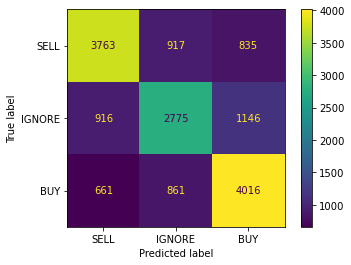

In [350]:
plot_confusion_matrix(blender_model,
                     X_test_blender,
                     y_test_blender,
                     values_format='d',
                     display_labels=['SELL', 'IGNORE', 'BUY'])

In [351]:
print(classification_report(y_test_blender, blender_model.predict(X_test_blender)))

              precision    recall  f1-score   support

           0       0.70      0.68      0.69      5515
           1       0.61      0.57      0.59      4837
           2       0.67      0.73      0.70      5538

    accuracy                           0.66     15890
   macro avg       0.66      0.66      0.66     15890
weighted avg       0.66      0.66      0.66     15890

